## Mobile Users Clustering

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
users_df = pd.read_csv('user_behavior_dataset.csv')
users_df.head(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2


#### Shape

In [4]:
users_df.shape

(700, 11)

#### Columns

In [5]:
users_df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

#### Dataframe Information

In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


## Data Cleaning

#### Remove Duplicates

In [7]:
users_df.duplicated().sum()

0

#### Nulls

In [8]:
users_df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

#### Uniques values

In [9]:
users_df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [10]:
users_df['User Behavior Class'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [11]:
users_df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [12]:
users_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Statistics

#### Quantiles

In [13]:
users_df.drop(columns=['User ID', 'User Behavior Class']).describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


#### Correlations

In [14]:
users_df.select_dtypes(include='number').drop(columns=['User ID', 'User Behavior Class']).corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000


## EDA

#### Columns : 'App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)' 'Number of Apps Installed'  'Data Usage (MB/day), 'Age'

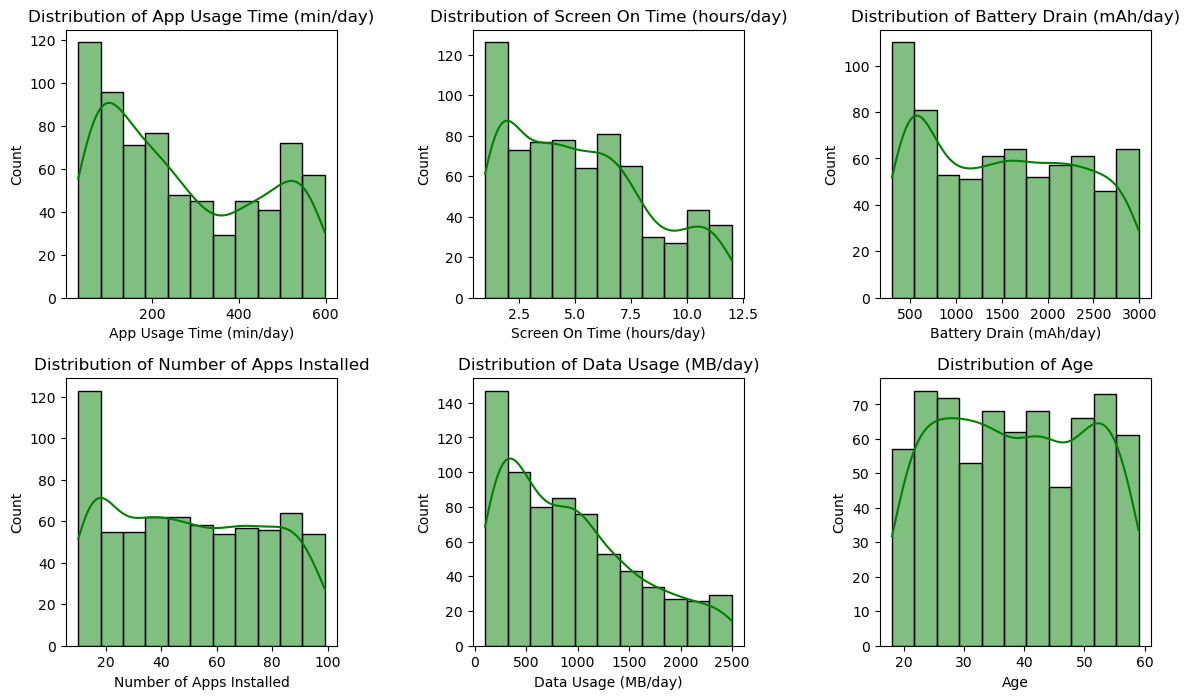

In [15]:
columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.histplot(x = i, data = users_df, kde = True, color='green')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

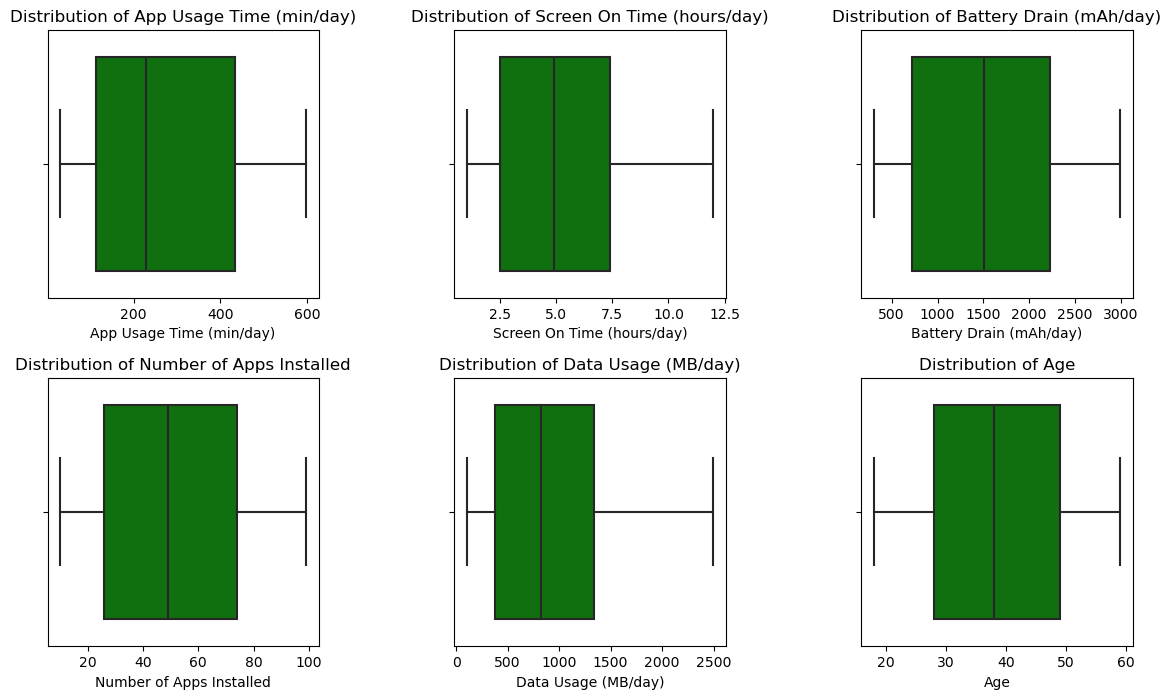

In [16]:
columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.boxplot(x = i, data = users_df, color='green')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

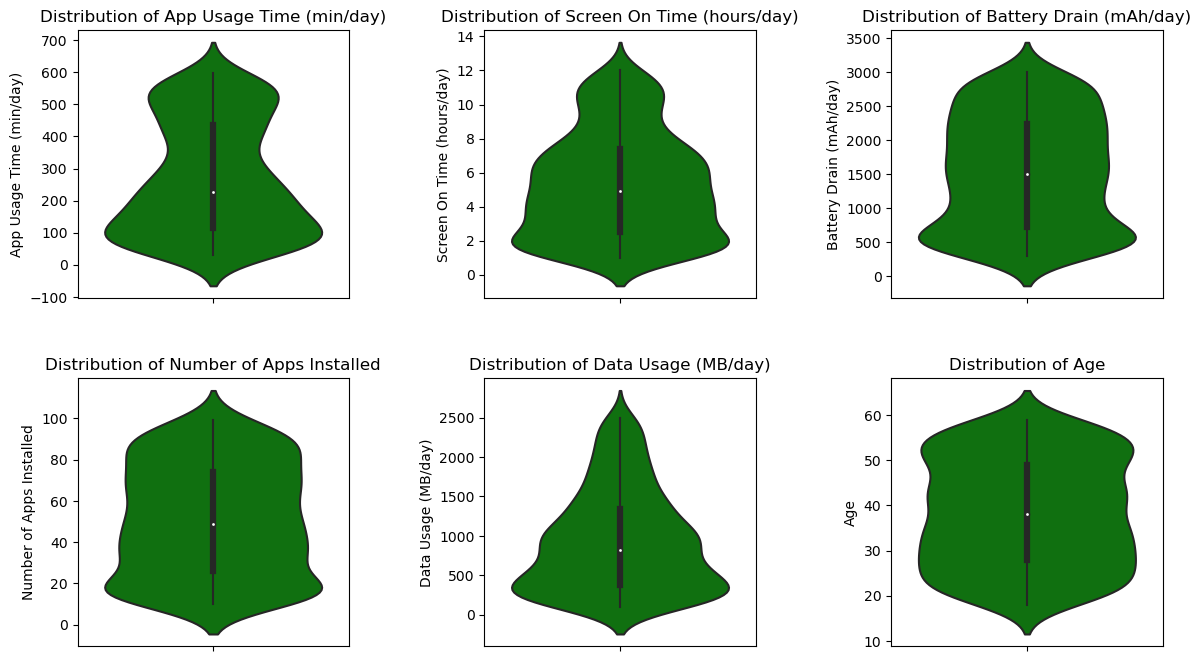

In [17]:
columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age']

plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.violinplot(y = i, data = users_df, color='green')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

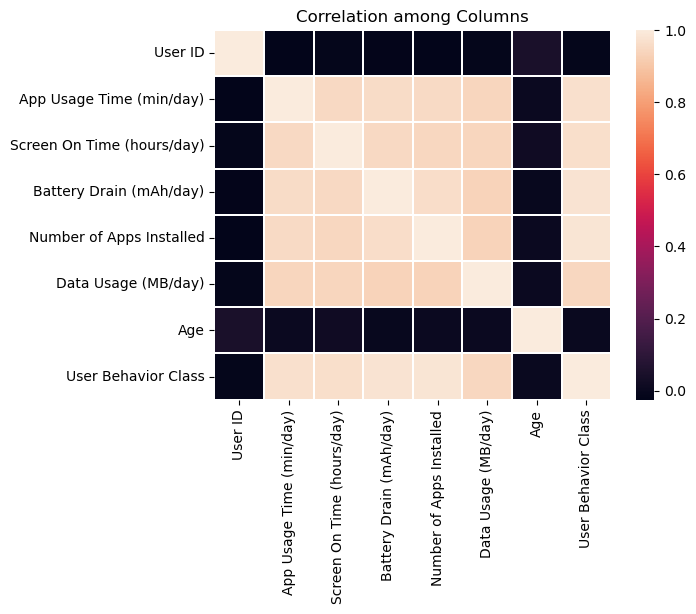

In [18]:
corrmatrix = users_df.corr(numeric_only=True)
sns.heatmap(data = corrmatrix, linewidths=.2, fmt='.2f')
plt.title('Correlation among Columns')
plt.show()

#### Columns : Device Model, Operating System, Gender, User Behavior Class

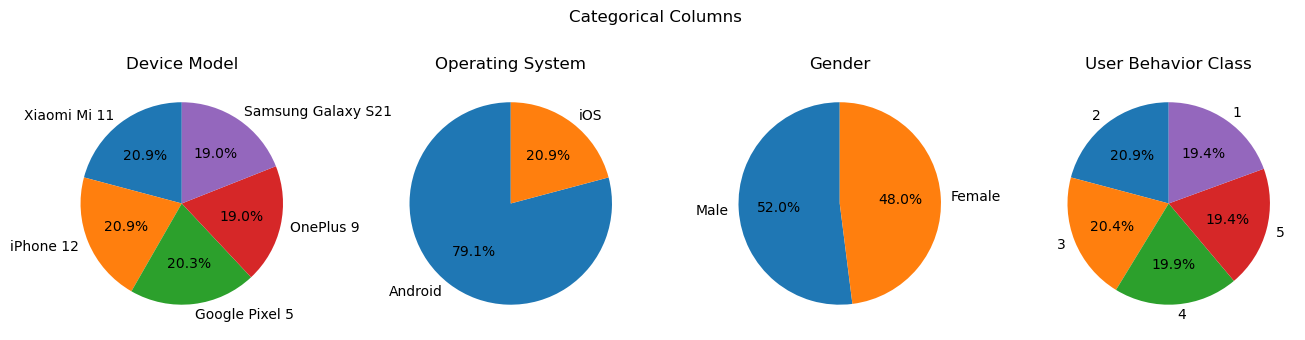

In [19]:
columns = ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']
plt.subplots(1,4,figsize=(16,4))
plt.subplots_adjust(wspace=0.3)

k = 1
for i in columns:
    col_dict = dict(users_df[i].value_counts())
    plt.subplot(1,4,k)
    plt.pie(x = col_dict.values(), labels=col_dict.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(f'{i}')
    k += 1

plt.suptitle('Categorical Columns')
plt.show()

## Data Preprocessing

#### Column Transformer

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
                                      ['Device Model', 'Operating System', 'Gender']), 
                                     ('scaler', MinMaxScaler(), ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)',
                                                                   'Number of Apps Installed', 'Data Usage (MB/day)', 'Age'])],
                       remainder='drop', sparse_threshold=0)
ct

ColumnTransformer(sparse_threshold=0,
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Device Model', 'Operating System',
                                  'Gender']),
                                ('scaler', MinMaxScaler(),
                                 ['App Usage Time (min/day)',
                                  'Screen On Time (hours/day)',
                                  'Battery Drain (mAh/day)',
                                  'Number of Apps Installed',
                                  'Data Usage (MB/day)', 'Age'])])

## Data Splitting

In [21]:
X = users_df.drop(columns=['User ID', 'User Behavior Class'])
Y = users_df['User Behavior Class']
X.shape, Y.shape

((700, 9), (700,))

## Model Selection

In [22]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering, DBSCAN, Birch

models = {
    'gauss_mix': GaussianMixture(n_components=5),
    'bayes_gauss_mix': BayesianGaussianMixture(n_components=5),
    'kmeans': KMeans(n_clusters=5),
    'bi_kmeans': BisectingKMeans(n_clusters=5),
    'minibatch_kmeans': MiniBatchKMeans(n_clusters=5),
    'aff_propagation': AffinityPropagation(),
    'agg_clustering': AgglomerativeClustering(n_clusters=5),
    'dbscan': DBSCAN(),
    'birch': Birch(n_clusters=5)
}

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import rand_score, make_scorer

X_pr = ct.fit_transform(X)
scores_df = pd.DataFrame(index = models.keys(), columns = ['scores', 'mean_score'])

for i in models.keys():
    scores = cross_val_score(models[i], X_pr, Y, cv = 5, scoring = make_scorer(rand_score))
    scores_df.loc[i, 'scores'] = np.round(scores, 2)
    scores_df.loc[i, 'mean_score'] = np.round(scores.mean(),2)
    print(f'{i} cross_validated')

gauss_mix cross_validated
bayes_gauss_mix cross_validated
kmeans cross_validated
bi_kmeans cross_validated
minibatch_kmeans cross_validated
aff_propagation cross_validated
agg_clustering cross_validated
dbscan cross_validated
birch cross_validated


In [24]:
scores_df

,scores,mean_score
gauss_mix,"[0.66, 0.65, 0.66, 0.68, 0.63]",0.66
bayes_gauss_mix,"[0.61, 0.62, 0.63, 0.63, 0.63]",0.62
kmeans,"[0.75, 0.73, 0.73, 0.73, 0.74]",0.73
bi_kmeans,"[0.7, 0.73, 0.76, 0.71, 0.74]",0.73
minibatch_kmeans,"[0.72, 0.7, 0.72, 0.72, 0.72]",0.71
aff_propagation,"[0.81, 0.8, 0.8, 0.8, 0.8]",0.8
agg_clustering,"[nan, nan, nan, nan, nan]",NaN
dbscan,"[nan, nan, nan, nan, nan]",NaN
birch,"[0.69, 0.71, 0.69, 0.7, 0.71]",0.7


In [25]:
model = AgglomerativeClustering(n_clusters=5)
rand_score(Y, model.fit_predict(X_pr))

0.6955896178213775

In [26]:
model = DBSCAN()
rand_score(Y, model.fit_predict(X_pr))

0.7404005722460658

## Model Building

In [27]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('transformer', ct), ('affinity_propagation', BisectingKMeans(n_clusters=5))])

pipe.fit(X)

Pipeline(steps=[('transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)',
                                                   'Age'])])),
                ('affinity_propagation', BisectingKMeans(n_clusters=5))])

## Model Evaluation

In [28]:
from sklearn.metrics import adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score, silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, pair_confusion_matrix

y_pred = pipe.predict(X)
y_labels = pipe.steps[1][1].labels_

metrics = {
    'rand_score': rand_score,
    'adjusted_rand_score': adjusted_rand_score,
    'mutual_info_score': mutual_info_score,
    'adjusted_mutual_info_score': adjusted_mutual_info_score,
    'normalized_mutual_info_score': normalized_mutual_info_score,
    'homogeneity_score': homogeneity_score,
    'completeness_score': completeness_score,
    'v_measure_score': v_measure_score,
    'fowlkes_mallows_score': fowlkes_mallows_score,
    'silhouette_score': silhouette_score,
    'calinski_harabasz_score': calinski_harabasz_score,
    'davies_bouldin_score': davies_bouldin_score,
    'pair_confusion_matrix': pair_confusion_matrix
}

evaluation_df = pd.DataFrame(index = metrics.keys(), columns = ['Score_Value'])

for i in metrics.keys():
    try:
        score = metrics[i](Y, y_pred)
        evaluation_df.loc[i, 'Score_Value'] = np.round(score, 2)
    except:
        score = metrics[i](X_pr, y_labels)
        evaluation_df.loc[i, 'Score_Value'] = np.round(score, 2)

In [29]:
evaluation_df

,Score_Value
rand_score,0.76
adjusted_rand_score,0.29
mutual_info_score,0.68
adjusted_mutual_info_score,0.43
normalized_mutual_info_score,0.43
homogeneity_score,0.42
completeness_score,0.45
v_measure_score,0.43
fowlkes_mallows_score,0.44
silhouette_score,0.21


## Original Vs Clustered

In [30]:
users_df['Clustered Class'] = y_pred

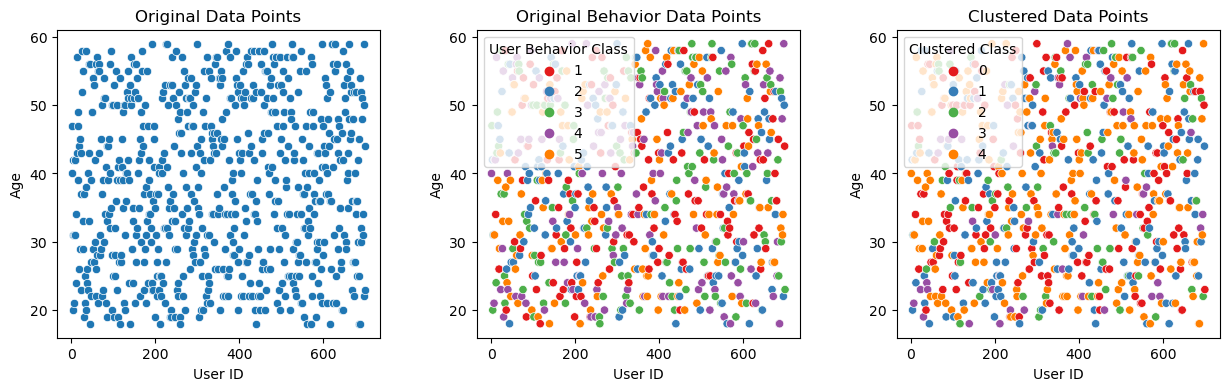

In [31]:
plt.subplots(1,3,figsize=(15,4))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,3,1)
sns.scatterplot(x = 'User ID', y = 'Age', data = users_df, palette='Set1')
plt.title('Original Data Points')

plt.subplot(1,3,2)
sns.scatterplot(x = 'User ID', y = 'Age', hue = 'User Behavior Class', data = users_df, palette='Set1')
plt.title('Original Behavior Data Points')

plt.subplot(1,3,3)
sns.scatterplot(x = 'User ID', y = 'Age', hue = 'Clustered Class', data = users_df, palette='Set1')
plt.title('Clustered Data Points')

plt.show()

In [32]:
users_df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'Clustered Class'],
      dtype='object')